# Example usage

To use `simplefit` in a project:

# Imports

In [3]:
import simplefit
import altair as alt
import warnings
import pandas as pd
warnings.filterwarnings('ignore')
alt.data_transformers.enable('data_server')
alt.data_transformers.enable('mimetype')
alt.renderers.enable('html')
print(simplefit.__version__)

0.1.0


# Sample Data
We will be using the SpotifyFeatures.csv data as an example.

In [5]:
df = pd.read_csv("../tests/data/SpotifyFeatures.csv")

df.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


# Clean data 
Loads and cleans the dataset, removes NA rows, strips extra white spaces, etc and returns clean dataframe. Imports the cleaner function from the module `simplefit.cleaner`

In [7]:
from simplefit.cleaner import cleaner
clean_df = cleaner(df,lower_case=False)
clean_df.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


# Plot Distributions 
Creates numerical distribution plots on either all the numeric columns or the ones provided to it. Import the `plot_distributions` function from the module `simplefit.eda`


In [9]:
from simplefit.eda import plot_distributions, plot_corr, plot_splom

In [11]:
dist_chart = plot_distributions(clean_df, bins = 40, dist_cols=['danceability', 'duration_ms', 'energy'])

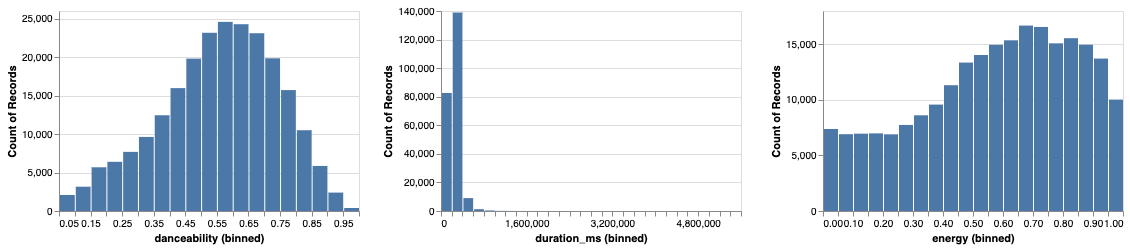

In [12]:
dist_chart

# Plot Correlation plot
Creates correlation plot for all the columns in the dataframe

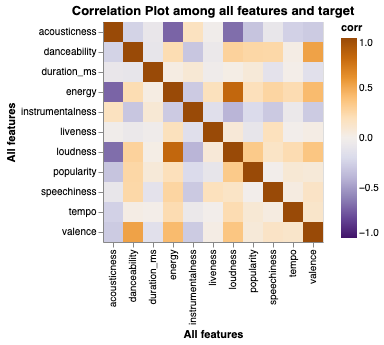

In [14]:
corr_chart = plot_corr(df, corr='spearman')
corr_chart

# Plot SPLOM
Creates `SPLOM` plot for all the numeric columns in the dataframe or the ones passed by the user

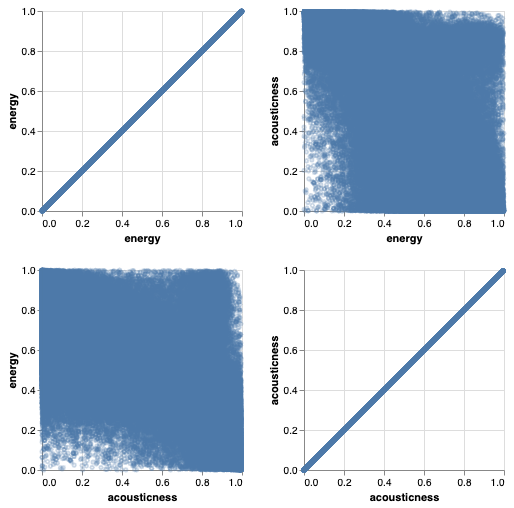

In [15]:
splom_chart = plot_splom(df, pair_cols=["energy", "acousticness"])
splom_chart

# Fit Regressor
Preprocesses the data, fits baseline model(Dummy Regressor) and Ridge with default setup and returns model scores in the form of a dataframe

In [16]:
from simplefit.regressor import regressor
regression_results = regressor(clean_df, target_col = 'popularity', numeric_feats = ['danceability', 'loudness'], categorical_feats=['genre'], cv=10)


In [17]:
regression_results

,DummyRegressor,Ridge,RidgeCV,linearRegression
fit_time,0.018519,0.217257,4.879717,0.267826
score_time,0.000374,0.007742,0.007390,0.007302
test_score,-0.353937,0.141713,0.145683,0.143420
train_score,0.000000,0.725900,0.725890,0.725904


# Fit Classifier
Preprocesses the data, fits baseline model(Dummy Classifier) and Logistic Regression with default setup and returns model scores in the form of a dataframe

In [ ]:
from simplefit.classifier import classifier

In [20]:
classification_df = pd.read_csv("../tests/data/adult.csv")
clean_classification_df = cleaner(classification_df,lower_case=True)


First the classifier is passed with all the inputs

In [23]:
classification_results = classifier(clean_classification_df, target_col = 'income', numeric_feats = ['age', 'fnlwgt'], categorical_feats=['occupation'], cv=10)

In [24]:
classification_results

,DummyClassifier,LogisticRegression
fit_time,0.012917,0.249683
score_time,0.004369,0.006884
test_score,0.759190,0.768619
train_score,0.759190,0.768912


We will now pass no values in the numeric features input to test the function. The function will pick up all numeric type columns

In [27]:
classification_results = classifier(clean_classification_df, target_col = 'income', numeric_feats = [], categorical_feats=['occupation'], cv=10)

In [28]:
classification_results

,DummyClassifier,LogisticRegression
fit_time,0.012836,0.220157
score_time,0.004508,0.006579
test_score,0.759190,0.792304
train_score,0.759190,0.821914
